# 1. Program to generate wordcloud from saved message in a folder

<ipython-input-19-6b73d3587472>:47: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


WordCloud saved to : C:\Users\ssaxen27\Documents\Python Proj\wc_outlook as wordcloud in pdf and png format


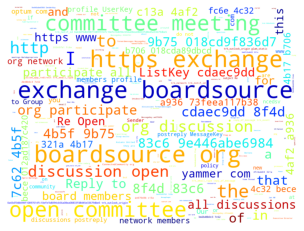

In [19]:
import os
import extract_msg
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from os import path
from glob import glob

def find_ext(dr, ext):
    return glob(path.join(dr, "*.{}".format(ext)))

# Get the current working directory
script_directory = os.getcwd()

# Combine the script directory with the relative path to your Outlook message files
outlook_messages_path = os.path.join(script_directory, 'msg')
# print(outlook_messages_path)

# Validate the path
if not os.path.exists(outlook_messages_path):
    print("Invalid path. Please provide a valid path.")
    exit()

file_list = find_ext(outlook_messages_path, 'msg')

msg_message = ' '
for f in file_list:
    msg = extract_msg.Message(f)
    msg_message = msg_message + msg.body
    msg.close()

wc = WordCloud(
    background_color='white',
    #colormap='binary',
    colormap='jet',
    stopwords=['google'],
    width=800,
    height=600
).generate(msg_message)

plt.axis("off")
plt.imshow(wc)
plt.show()

# Save the WordCloud as an image (e.g., PNG)
output_path = os.path.join(script_directory, 'wordcloud.png')
plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=600)


# Save the WordCloud as a PDF
output_path = os.path.join(script_directory, 'wordcloud.pdf')
plt.savefig(output_path, format='pdf', bbox_inches='tight', pad_inches=0)

print(f"WordCloud saved to : {script_directory} as - wordcloud file in pdf and png format")

# 2. Program for reading directly from outlook App

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssaxen27\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter the outlook folder name : Secure
WordCloud saved to : C:\Users\ssaxen27\Documents\Python Proj\wc_outlook as - wordcloud_outlook file in pdf and png format


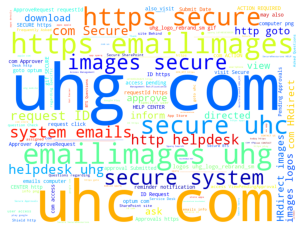

In [21]:
import os
import win32com.client
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def get_outlook_messages(folder_name):
    outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")
    inbox = outlook.GetDefaultFolder(6)  # 6 refers to the index of Inbox
    target_folder = inbox.Folders[folder_name] if folder_name in [f.Name for f in inbox.Folders] else inbox

    messages = target_folder.Items
    message_text = " "
    for message in messages:
        try:
            message_text += message.Body
        except Exception as e:
            print("Error reading message: ", e)
    return message_text

script_directory = os.getcwd()

# Replace 'YourFolderName' with the name of the folder you want to read from
folder_name = input('Enter the outlook folder name : ')  # Replace with your folder name
msg_message = get_outlook_messages(folder_name)

wc = WordCloud(
    background_color='white',
    #colormap='binary',
    colormap='jet',
    stopwords=set(stopwords.words('english')),
    width=800,
    height=600
).generate(msg_message)

plt.axis("off")
plt.imshow(wc)

# Save the WordCloud as an image (e.g., PNG)
output_path = os.path.join(script_directory, 'wordcloud_outlook.png')
plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=600)

# Save the WordCloud as a PDF
output_path = os.path.join(script_directory, 'wordcloud_outlook.pdf')
plt.savefig(output_path, format='pdf', bbox_inches='tight', pad_inches=0)

print(f"WordCloud saved to : {script_directory} as - wordcloud_outlook file in pdf and png format")